# Understand the Problem 
**Kyphosis:** is an abnormally excessive convex curvature of the spine. The kyphosis data has 81 rows and 4 columns, representing data on children who had corrective spinal surgery. 

**Goal:** predict if the kyphosis absent or present

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Upload the data from kaggle 

In [2]:
data = pd.read_csv("/kaggle/input/kyphosiss/kyphosis.csv")

In [4]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
data.shape

(81, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## Another way to find mean, max ,and min

In [8]:
#find the maximum age and divide it by 12 to convert it from month to years
data['Age'].max()/12

17.166666666666668

In [9]:
#find the minimum age and divide it by 12 to convert it from month to years
data['Age'].min()/12

0.08333333333333333

In [10]:
#mean
data['Age'].mean()

83.65432098765432

In [11]:
data.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [12]:
data['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

# Visualization

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
data['Kyphosis'] = labelencoder.fit_transform(data['Kyphosis'])

In [15]:
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


<Axes: >

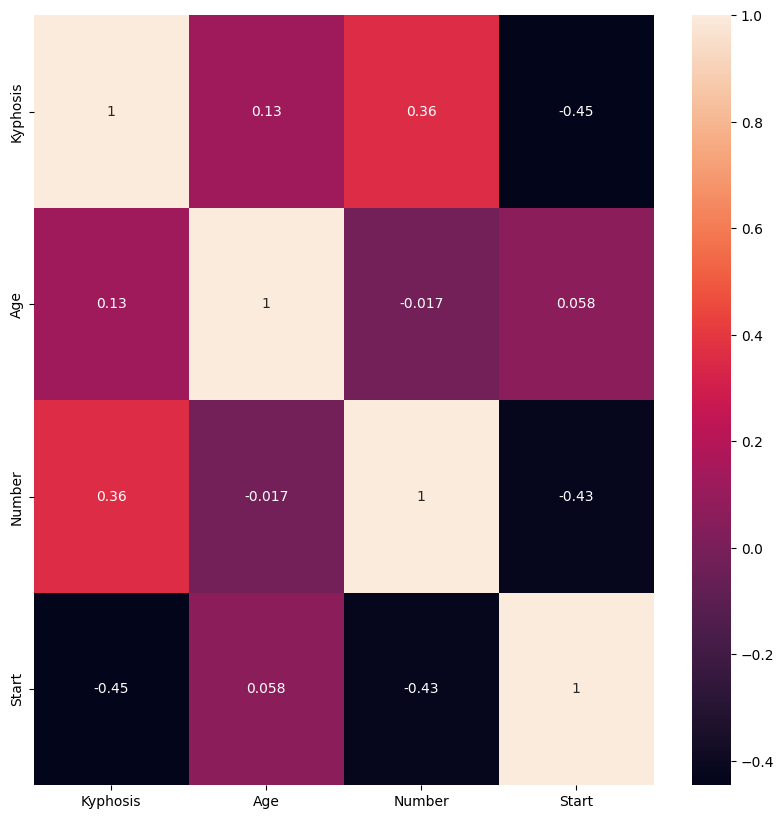

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

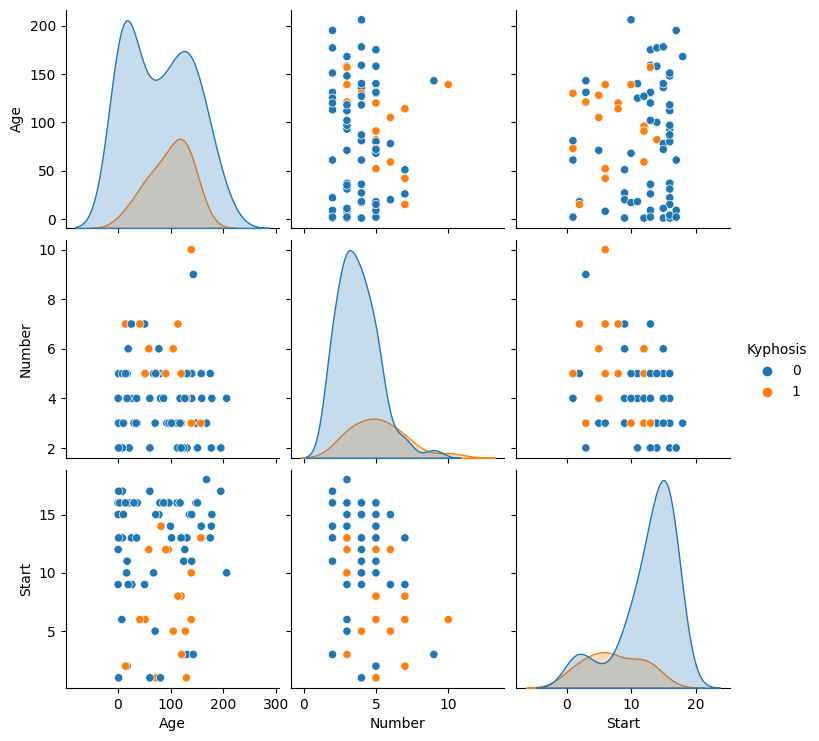

In [17]:
sns.pairplot(data, hue = 'Kyphosis')

<Axes: xlabel='Kyphosis', ylabel='count'>

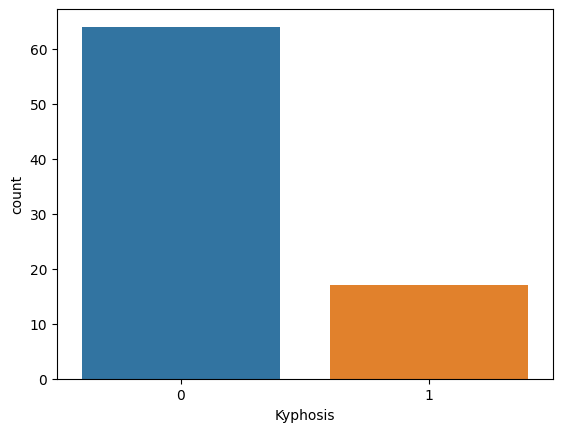

In [18]:
sns.countplot(x = data['Kyphosis'])

# Create training and testing dataset

In [4]:
X = data.drop(['Kyphosis'], axis=1)
y = data['Kyphosis']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [18]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Train a logistic regression classifier model

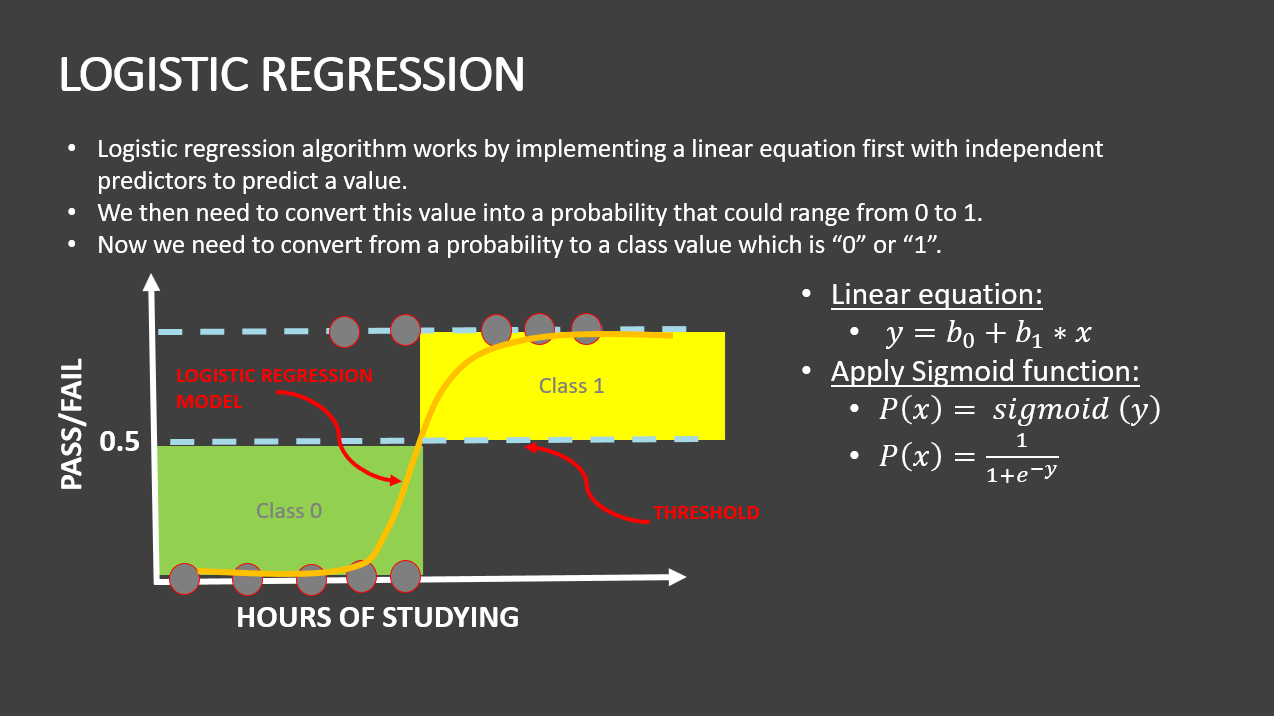

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluate the model performance

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

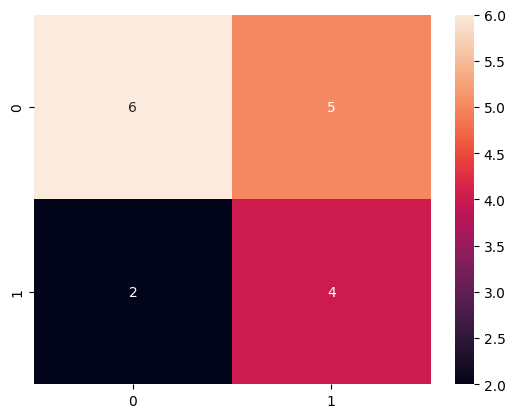

In [8]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.50      0.67         4

    accuracy                           0.88        17
   macro avg       0.93      0.75      0.80        17
weighted avg       0.90      0.88      0.87        17



# Decision Trees and Random Forest Classifier

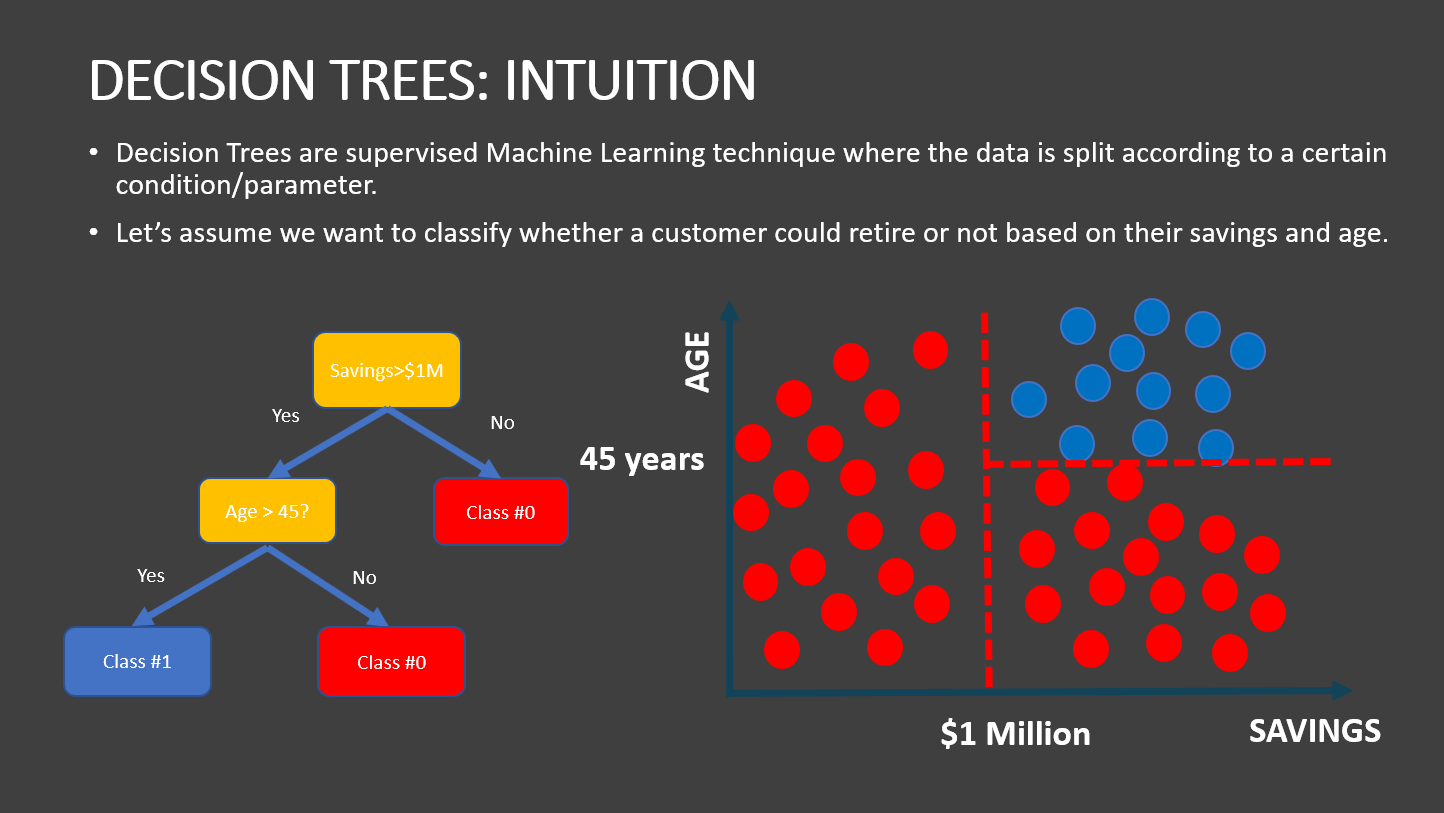

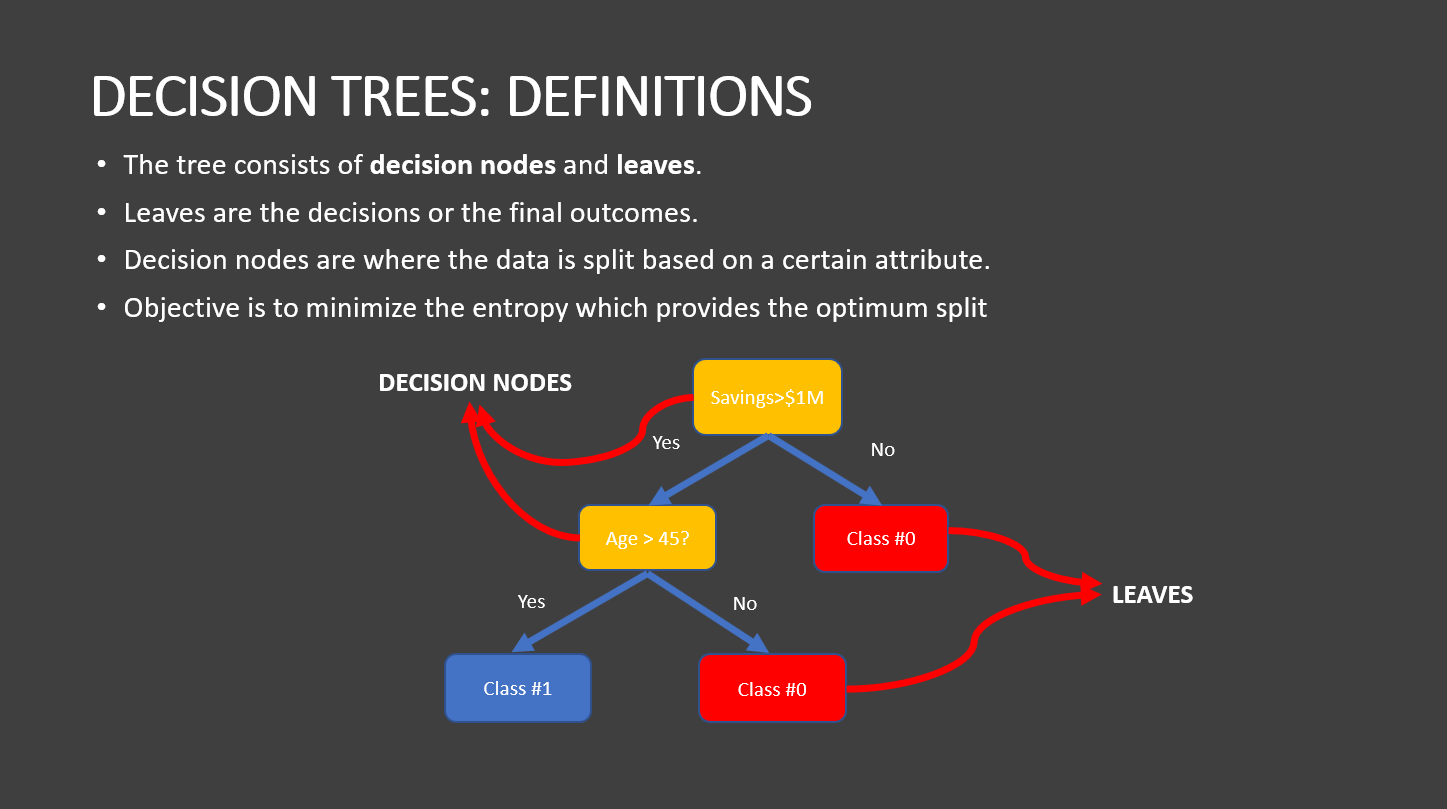

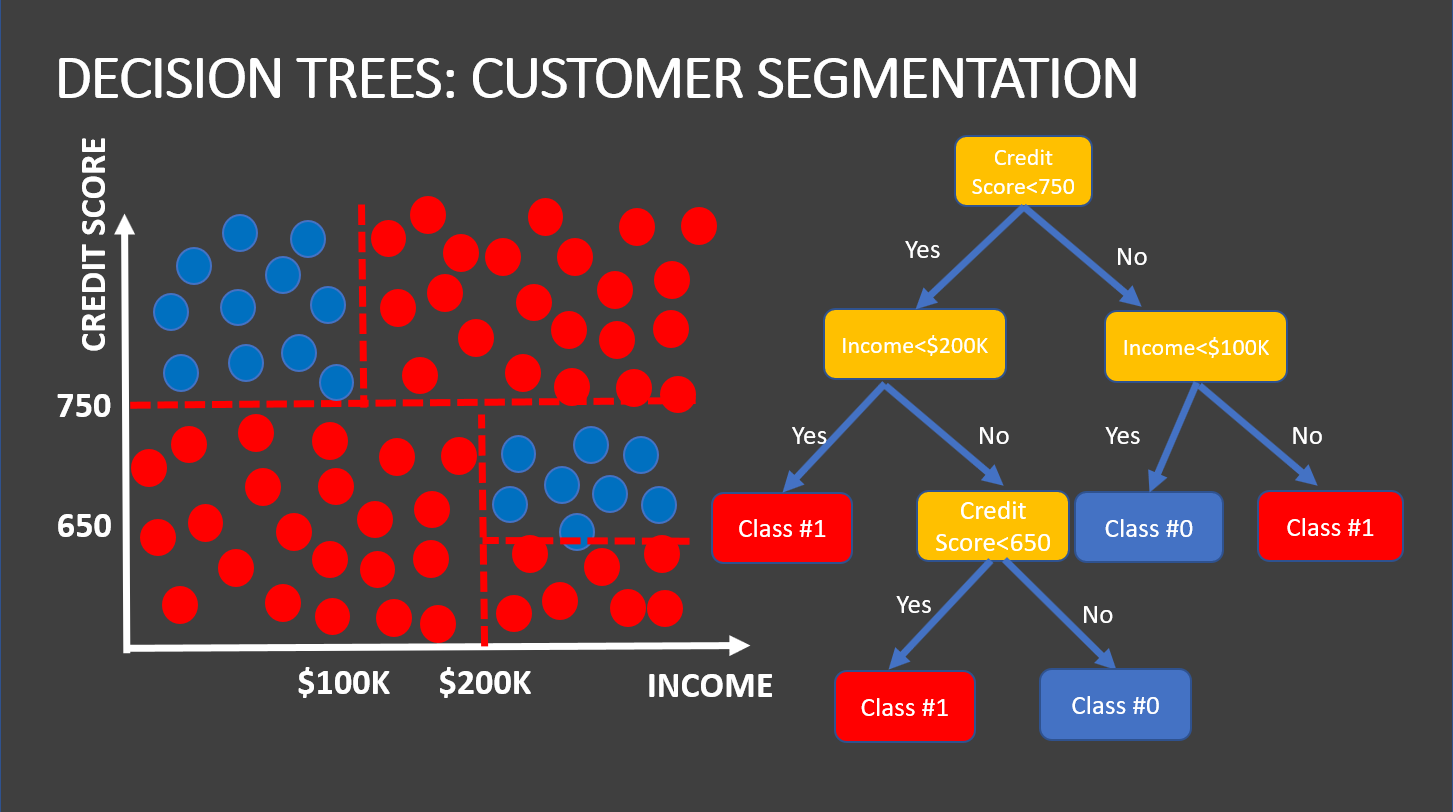

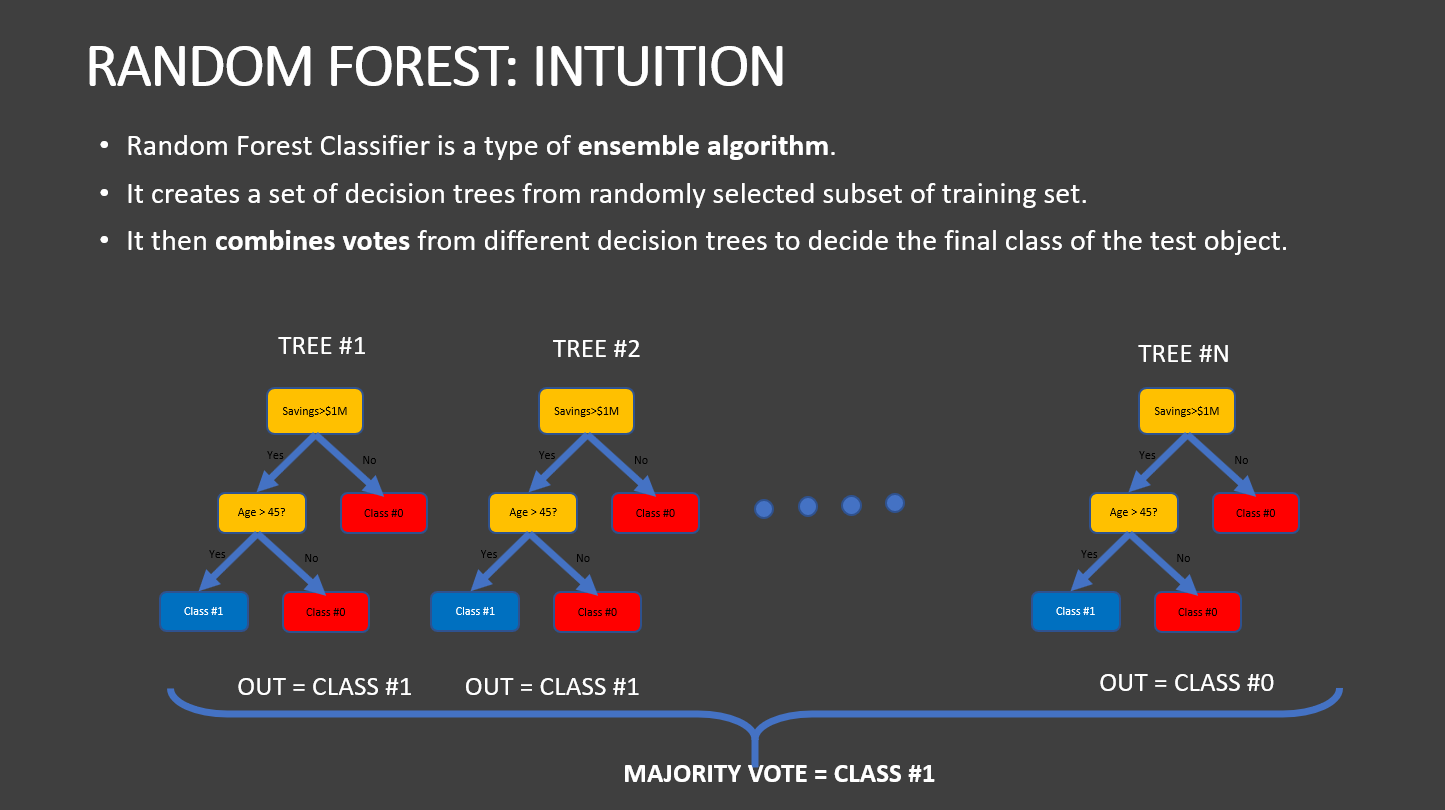

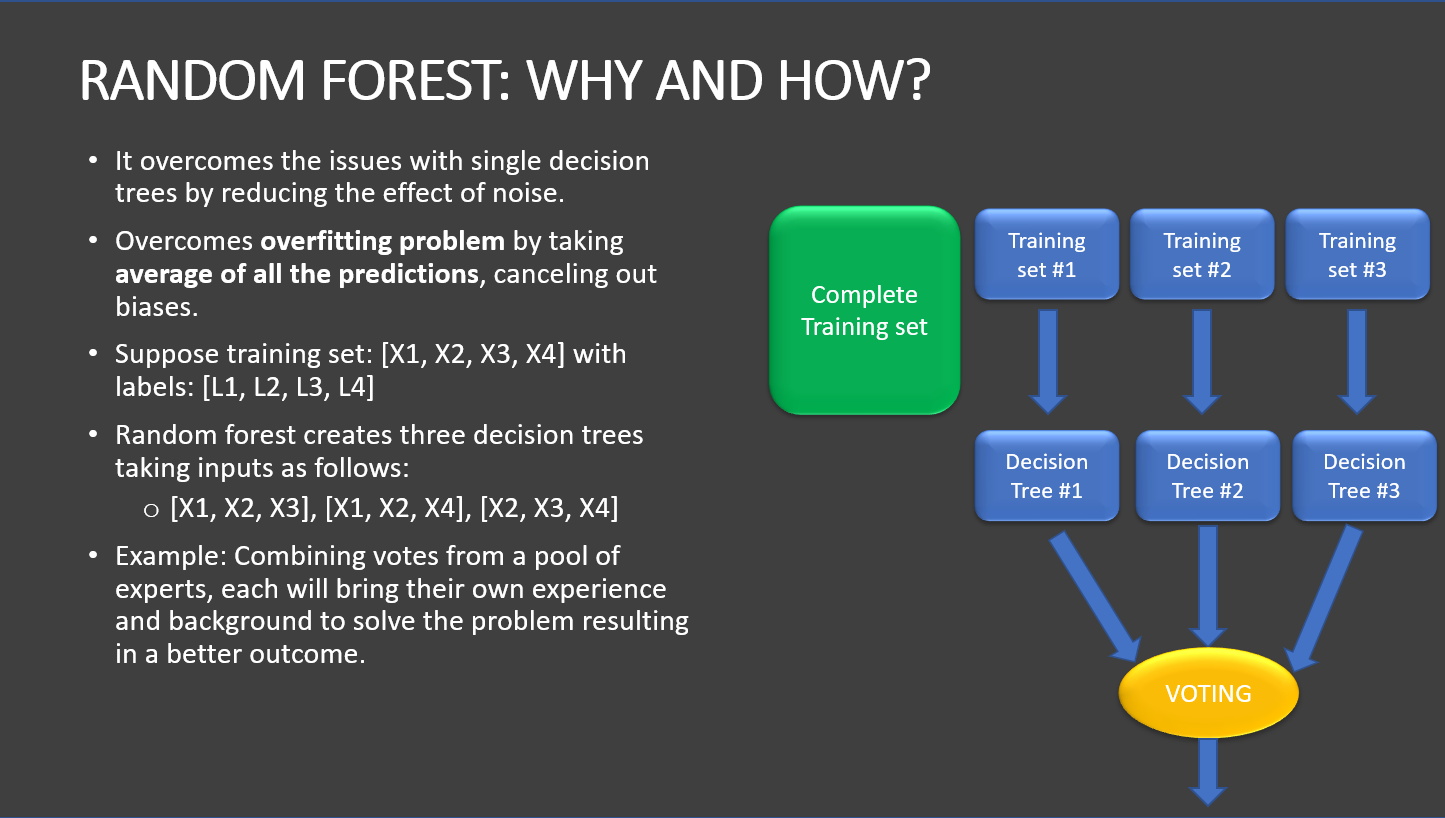

In [27]:
from sklearn.tree import DecisionTreeClassifier


DecisionTreeClassifier()

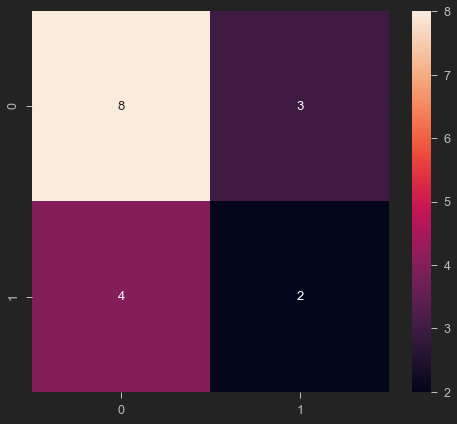

In [28]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support



           0       0.67      0.73      0.70        11

           1       0.40      0.33      0.36         6



    accuracy                           0.59        17

   macro avg       0.53      0.53      0.53        17

weighted avg       0.57      0.59      0.58        17


